# Trabalho Final GCC-108 - Teoria da Computação #
Prof.: Douglas H. S. Abreu

Nome: Ramon Riuller de Souza, Estênio Tavares Damásio 

Turma: 14A

Link do repositório [GitHub](https://github.com/tdamasio/Trabalho-Teoria-da-computa-o)

_______________________________________________________________________________________________________________________________

●	O trabalho deve ser feito em grupos de no máximo 2 componentes

●	Trabalhos entregues após a data limite não serão aceitos

●	Data limite de entrega: 29 de Abril de 2022 : 23h59m

●	Enviar o trabalho para o campus virtual, do seguinte modo: Notebook exportado em PDF contendo o código e também o link do repositório GitHub para acesso aos arquivos. A Documentação deve estar no readme

●	O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python
_______________________________________________________________________________________________________________________________ 

# Introdução
Este trabalho propõe a utilização de operações da aritmética computacional por meio de uma Máquina de Turing. A máquina que foi desenvolvida recebe como entrada dois números em binário e gera como saída o resultado da adição desses números.

#### Números binários e adição em números binários 

Os números binários são utilizados para representar dados em um meio digital, como por exemplo, a representação no meio analógico com presença ou ausência de carga elétrica e no meio digital por meio de zeros e uns. Essa representação com dois símbolos utiliza-se da mesma técnica do telégrafo, que transmitia mensagens por código Morse, sendo os símbolos curto e longo análogos ao zero e um (1).

Utilizando-se a notação binária é possível representar uma faixa de valores diferentes de acordo com a quantidade de bits. Por exemplo, com dois bits pode-se representar quatro valores distintos, sendo eles 00, 01, 10 e 11. Ou seja, com n bits, podemos representar 2n valores distintos. 

Para a notação de números inteiros usando a base binária de zeros e uns, podemos representar os números utilizando as seguintes representações: de binário puro, de binários em sinal magnitude e a representação em complemento de 2 (1).

Tomando como base a representação de números inteiros na base binária pura, que também é a representação utilizada neste trabalho, pode-se observar na Tabela 1, que com quatro bits temos as seguintes possibilidades para números inteiros.

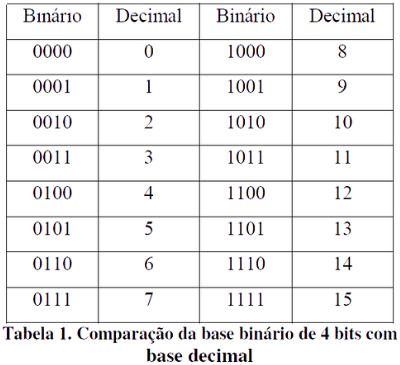

As operações matemáticas de adição e subtração feitas na base binária seguem as mesmas regras da base decimal, contando com a diferença que temos apenas dois dígitos. Para a adição de dois números, temos quatro possibilidades de valores, sendo elas: 0 + 0, 0 + 1, 1 + 0, e 1 + 1. As três primeiras têm os mesmos resultados de uma operação em decimal, já para a operação de 1 + 1 temos como resultado zero, gerando um “vai um” para a coluna da esquerda (1).

#### Máquina de Turing

Turing descreve um computador digital como sendo formado por: uma unidade de armazenamento, uma unidade de execução e uma unidade de controle. A unidade de armazenamento é formada por uma fita, dividida em células, com um cabeçote apontando para a célula atual, a qual pode ser lida/escrita de acordo com a unidade de execução. Por sua vez, a unidade de execução tem como objetivo fazer a leitura do caractere representado na célula atual, analisar o que deve ser feito e alterar quando necessário. Já a unidade de controle faz as movimentações do cabeçote de acordo com o que a unidade de execução deseja, movendo o cabeçote para esquerda ou direita (2).

### Exercício 1)
Descreva com suas palavras uma estratégia para o desenvolvimento de uma maquina de Turing que compute a soma de 2 numeros binário.

Faria primeiro uma conversão dos números binários para unários,  e depois faria com que a máquina concatenasse os dois números e apagaria o último 1, pois assim ficaria a quantidade exata da soma.

### Exercício 2) 
Faça o esboço por meio de desenho da máquina de Turing proposta.





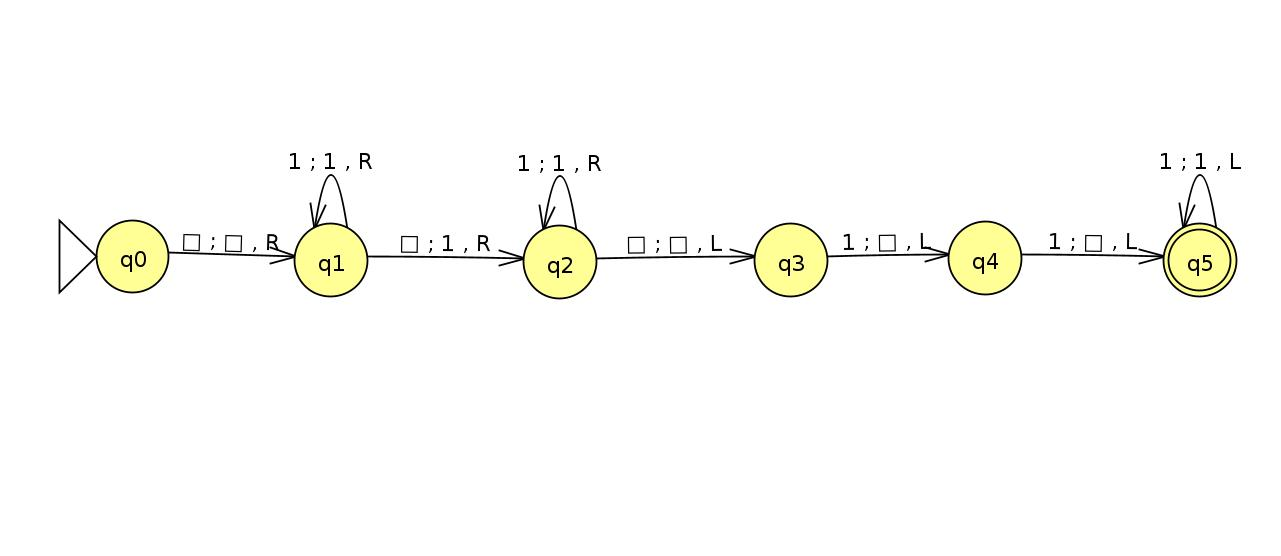


### Exercício 3)
Defina a MT como uma quíntupla M=(Q,Σ,Γ,δ,q_0):
	
    Q = conjunto de estados (padrão q[0-9]+)
	
    Σ = alfabeto de entrada
	
    Γ = alfabeto da fita
	
    δ = função de transição no formato (q_i,x)→(q_j,y,D); assim, estando no estado q_i, lendo x, vai para o estado q_j, escreve y e movimenta na direção de D. D será L para esquerda ou R para direita.
    
    q_0 = estado inicial
    
    Q = [q0, q1, q2, q3, q4, q5]
    Σ = {0, 1}
    Γ = {B,1}
    δ =(q0, B)→(q1, B, D)
       (q1, B)→(q2, 1, D)
       (q1, 1)→(q1, 1, D)
       (q2, B)→(q3 , B, E)
       (q2, 1)→(q2, 1, D)
       (q3, 1) →(q4 , B, E)
       (q4,1)→(q5, B, E)
       (q5, 1)→(q5, 1, E)
    q0 = estado inicial

    
### Exercício 4)
Faça a conversão de M em R(M)

0001011101101110110011011101110110110011011011011011001110111011110111010011101101110110110011110110111110111010011111011011111101110100111111011011111101101000


### Exercício 5) 
Desenvolva uma função MTU que receba R(M) acrescido de uma entrada w, onde w é um arquivo csv que contem dois números binário. A saída da função MTU deve ser a computação de M para uma entrada w.
____________________________________________________________________________________________________________________

In [1]:
import csv
from gettext import find

#Função para converter binário em unário
def binToUnary(bins):
    unys = []
    for i in bins:
        x = int(i,2)
        un = '1'
        while(x > 0):
            un += '1'
            x = x-1
        unys.append(un)
    return unys

def main():
    #Lendo os números do arquivo
    arquivo = open('exemplo2.CSV')
    exemplo = csv.reader(arquivo)
    binarios = []
    for aux in exemplo:
        entrada = aux
    binarios = entrada[0].split(";")
    #print(binarios)
    #Convertendo em Unário
    #binarios = ["1111","1000010"]
    unarios = binToUnary(binarios)
    
    #representação de R(m) com w - Fita 1
    Rm = '0001011101101110110011011101110110110011011011011011001110111011110111010011101101110110110011110110111110111010011111011011111101110100111111011011111101101000'
    #print(unarios)
    Rm += unarios[0] + "01110" + unarios[1]
    
    #Dividindo as transições da entrada
    aux = Rm.split("000")
    #print(aux)
    #transições
    transitions = aux[1].split("00")
    #print(transitions)
    #Fita 2 - estado atual
    estado_atual = '1'

    #fita de entrada
    fita_entrada = []
    cont = 0
    for i in unarios:
        fita_entrada.append("111")
        for j in i:
            aux = j + j
            fita_entrada.append(aux)
        cont = cont +1
    fita_entrada.append("111")
    #print(fita_entrada)
    cabeça_leitura = ""
    #Funcionamento da máquina
    cont = 1
    while(cont > 0):
        en = fita_entrada[cont - 1]
        t = estado_atual + "0" + en  + "0"
        for i in transitions:
           if(i.find(t) == 0):
               x = i.split("0")
               estado_atual = x[2]
               fita_entrada[cont - 1] = x[3]
               cabeça_leitura = x[4]
               if(cabeça_leitura =="11"):
                   cont = cont +1
               else:
                cont = cont - 1
               
               if(estado_atual == "111111"):
                   cont = 0
    #print(fita_entrada)
    total = ""
    for s in fita_entrada:
        if s =="11":
            total = total + "1"
    tamanho = len(total)
    saida = total[:tamanho - 1]
    num_dec = len(saida)
    num_bin = format(num_dec,"b")
    print(num_bin)
        
if __name__ == "__main__":
      main()


1100101


___________

### Exercício 6) (3)

_A)_ Explique a Tese de Chuch-Turing de forma sucinta

A tese de Church - Turing afirma que, dado qualquer problema de decisão que pode ser resolvido por um método efetivo, num número finito de passos, então existe uma máquina de Turing que também resolve o problema. A tese não pode ser formalmente provada, no entanto, pode ser refutada, basta a descoberta de uma máquina mais poderosa que uma máquina de Turing.


_B)_ Dada uma máquina de Turing arbitrária M e uma string de entrada w, a computação de M com entrada w irá parar em menos de 100 transições? Descreva uma máquina de Turing que resolva esse problema de decisão.

Não se pode afirmar, pois não se conhece o que M computa, e não se sabe se w é uma entrada válida ou que pertence a linguagem de M, e mesmo se for válida, sem conhecer M não se pode afirmar que vai parar com menos de 100 transições ou se ela vai parar, é um problema de indecidibilidade.
O problema da parada exige um algoritmo que responda a questão para qualquer combinação de MT M e string de entrada w.


_C)_ Motre a solução para cada um dos seguintes sistemas de correspondência de Post:

a) (a, aa), (bb, b), (a, bb)
 
Solução
$
\begin{bmatrix}
a\\
aa\\
\end{bmatrix}
$
$\begin{bmatrix}
a\\
bb\\
\end{bmatrix}
$
$\begin{bmatrix}
bb\\
b\\
\end{bmatrix}
$
$
\begin{bmatrix}
bb\\
b\\
\end{bmatrix}
$


b) (a, ab), (ba, aba), (b, aba), (bba, b)

Solução
$
\begin{bmatrix}
a\\
ab\\
\end{bmatrix}
$
$
\begin{bmatrix}
bba\\
b\\
\end{bmatrix}
$
$
\begin{bmatrix}
ba\\
aba\\
\end{bmatrix}
$


c) (abb, ab), (aba, ba), (aab,a bab)

Sem Solução
$
\begin{bmatrix}
abb\\
ab\\
\end{bmatrix}
$
$\begin{bmatrix}
aba\\
ba\\
\end{bmatrix}
$
$
\begin{bmatrix}
aba\\
ab\\
\end{bmatrix}
$
$
\begin{bmatrix}
abb\\
ab\\
\end{bmatrix}
$


d) (ab,aba), (baa, aa), (aba, baa)

Sem Solução
$
\begin{bmatrix}
ab\\
aba\\
\end{bmatrix}
$
$
\begin{bmatrix}
aba\\
baa\\
\end{bmatrix}
$
$
\begin{bmatrix}
ab\\
aba\\
\end{bmatrix}
$


e) (a, aaa), (aab, b), (abaaa, ab)

Solução
$
\begin{bmatrix}
a\\
aaa\\
\end{bmatrix}
$
$
\begin{bmatrix}
aab\\
b\\
\end{bmatrix}
$


f) (ab, bb), (aa, ba), ab, abb), (bb, bab)

Sem Solução
$
\begin{bmatrix}
ab\\
abb\\
\end{bmatrix}
$
$
\begin{bmatrix}
bb\\
bab\\
\end{bmatrix}
$
$
\begin{bmatrix}
ab\\
bb\\
\end{bmatrix}
$
$
\begin{bmatrix}
bb\\
bab\\
\end{bmatrix}
$



D)
a)Prove que a função é primitiva recursiva


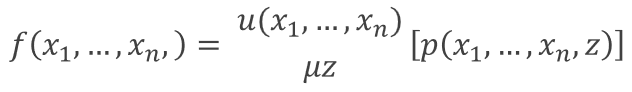

sempre que p e u são recursivas primitivas

Os predicados resultantes são recursivos primitivos, uma vez que os componentes da composição são recursivos primitivos. Então temos que é recursiva primitiva pois é formada por funções recursivas primitivas e como faz uma busca em um intervalo, ela garante a totalidade tendo um valor para tudo dentro do intervalo. 

b) defina o valor "passo a passo" de gn(4,1,0,2,1) =

$pn(0)^{4+1} * pn(1)^{1+1} * pn(2)^{0+1} * pn(0)^{2+1} * pn(1)^{1+1}$

$2^{4+1} * 3^{1+1} * 5^{0+1} * 7^{2+1} * 11^{1+1}$

$32 * 9 * 5 * 343 * 121 = 59764320$


E)

a) Dado f(x) = 3x² + 4x + 6 e g(x) = 5x²

Prove que g(x) ∈ O(f) e f(x) ∈ O(g)

As duas funções tem como maior expoente um termo elevado ao quadrado, sendo que g(x) pode ser maior que f(x), 
como ambas são quadráticas, f(x) está em g(x). E como ambas são quadradas ignorando o termo ao lado do x, por ser
uma constante, ambas são de O($x^{2}$)

b) Qual é a complexidade e o "big O" de M'?

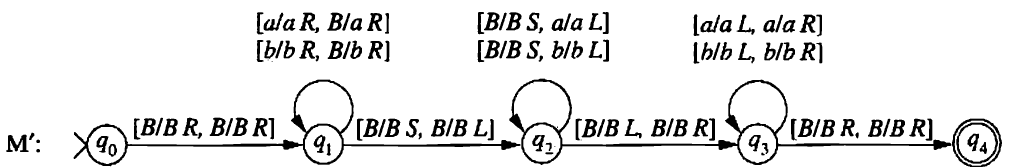

Contando o  número de transições em cada passo, o tempo de complexidade de M’ é : tcM’(n) = 3(n + 1) + 1.
= 3n + 3 + 1
     = 3n + 4

Big O confere a O(n) que pode ser  O(1) 


# Referências

(1) _Ronald. J. Tocci, Neal. S. Widmer e Gregory L. Moss. 2011. Sistemas Digitais: Princípios e Aplicações. (11ª ed.). Pearson._

(2) _Alan Turing. 1937. Computability and λ-definability. Journal of Symbolic Logic, 2, 4: 153–163._

(3) _Sudkamp, T. A. 2006. Languages and machines: an introduction to the theory of computer science. 3rd Edition_

In [2]:
# bla bla bla
x= "sala"
x

'sala'

In [3]:
# função MTU = {R(M)| R(M) aceite w}

def MTU ()

SyntaxError: invalid syntax (3413492638.py, line 3)

In [ ]:
# bla bla bla

_______________________________________________________________________________________________________________________________
# Links úteis:

Link do site [Jupyter](https://jupyter.org/)

Link do site [Anaconda](https://www.anaconda.com/)

Link para ajuda com [Markdown no Notebook](https://acervolima.com/celula-markdown-no-caderno-jupyter/)


In [ ]:
import pandas as pd
exemplo = pd.read_csv('exemplo2.CSV')
exemplo

In [ ]:
txt = "0001110101001110110011110011111110101011010001111111011111"

x = txt.split("000")
print(x)
y = txt.split("00")
print(y)
print(len(y[2]))